# 붓꽃 결정 트리 분류기

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2, random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train) 

DecisionTreeClassifier(random_state=156)

In [3]:
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin\\'

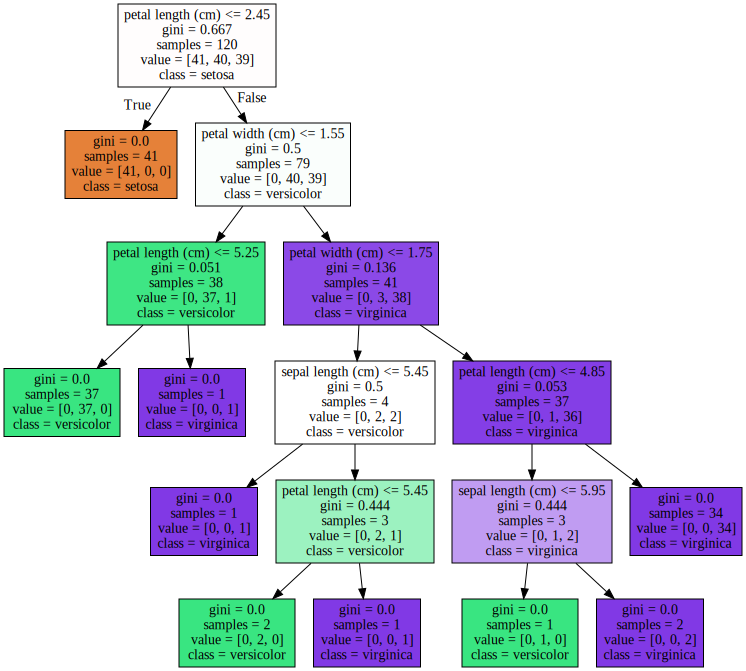

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]


<AxesSubplot:>

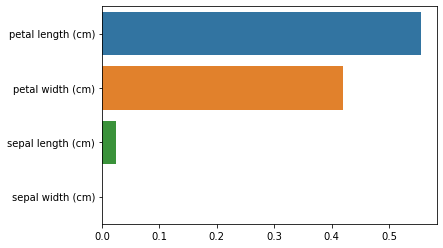

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3))) # 특징 중요도 출력

# feature별 importance 매핑
dic = {}

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    dic[name] = value
    
# feature importance를 column 별로 시각화하기
x_val = []
y_val = []

for y, x in sorted(dic.items(), key = lambda x : x[1], reverse = True):
    y_val.append(y)
    x_val.append(x)
    
sns.barplot(x=x_val, y=y_val)  # 내림차순 정렬 필요

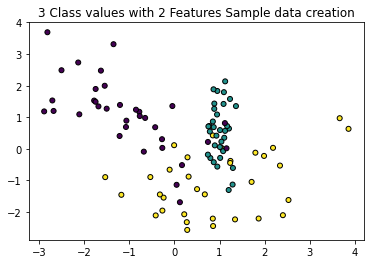

In [6]:
from sklearn.datasets import make_classification # 임의로 데이터를 만드는 모듈
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], c=y_labels, s=25, edgecolor='k')

In [10]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
             clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                         levels=np.arange(n_classes + 1) - 0.5,
                         cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

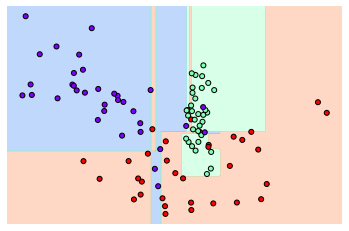

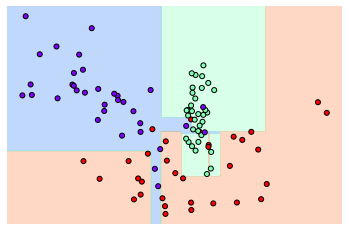

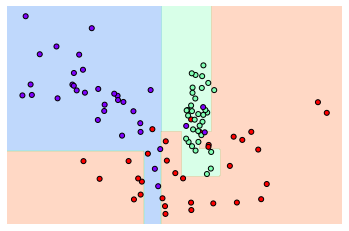

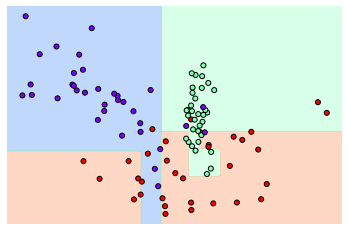

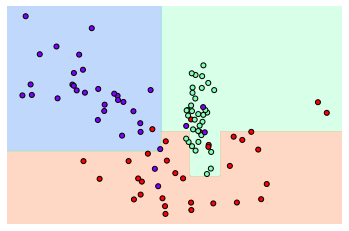

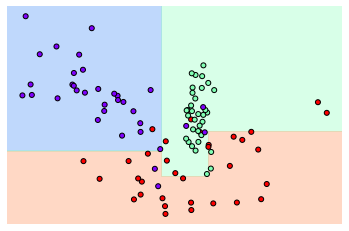

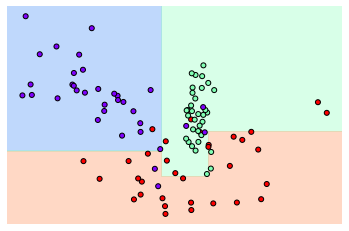

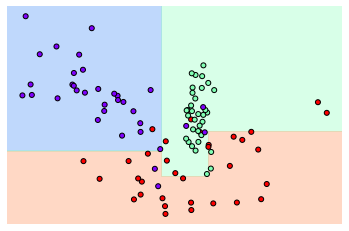

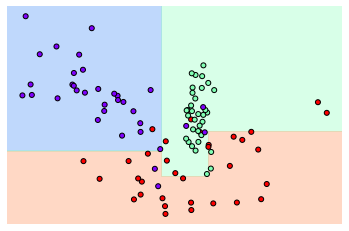

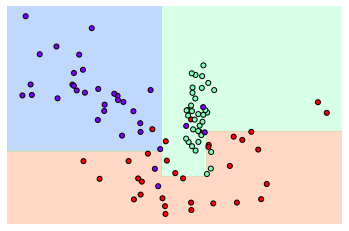

In [16]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 Decision Boundary 시각화.
for i in range(1, 11):
    dt_clf = DecisionTreeClassifier(min_samples_leaf = i).fit(X_features, y_labels)
    visualize_boundary(dt_clf, X_features, y_labels)

# 타이타닉 결정 트리 분류기

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [21]:
titanic = sns.load_dataset("titanic")
titanic = titanic.drop(['embark_town', 'deck', 'class', 'who', 'alive'], axis = 1)
titanic.age.fillna(titanic.age.mean(), inplace = True)
titanic.embarked.fillna('N', inplace = True)

sex_item = list(set(titanic.sex))
encoder = LabelEncoder()
encoder.fit(sex_item)
sex_label = encoder.transform(titanic.sex)
titanic.sex = sex_label

embarked_item = list(set(titanic.embarked))
encoder = LabelEncoder()
encoder.fit(embarked_item)
embarked_label = encoder.transform(titanic.embarked)
titanic.embarked = embarked_label

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int32  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int32  
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int32(2), int64(4)
memory usage: 50.6 KB


In [22]:
from sklearn.model_selection import train_test_split

X = titanic.drop(['survived'], axis = 1)
Y = titanic['survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 156)

dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=156)

In [24]:
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin\\'

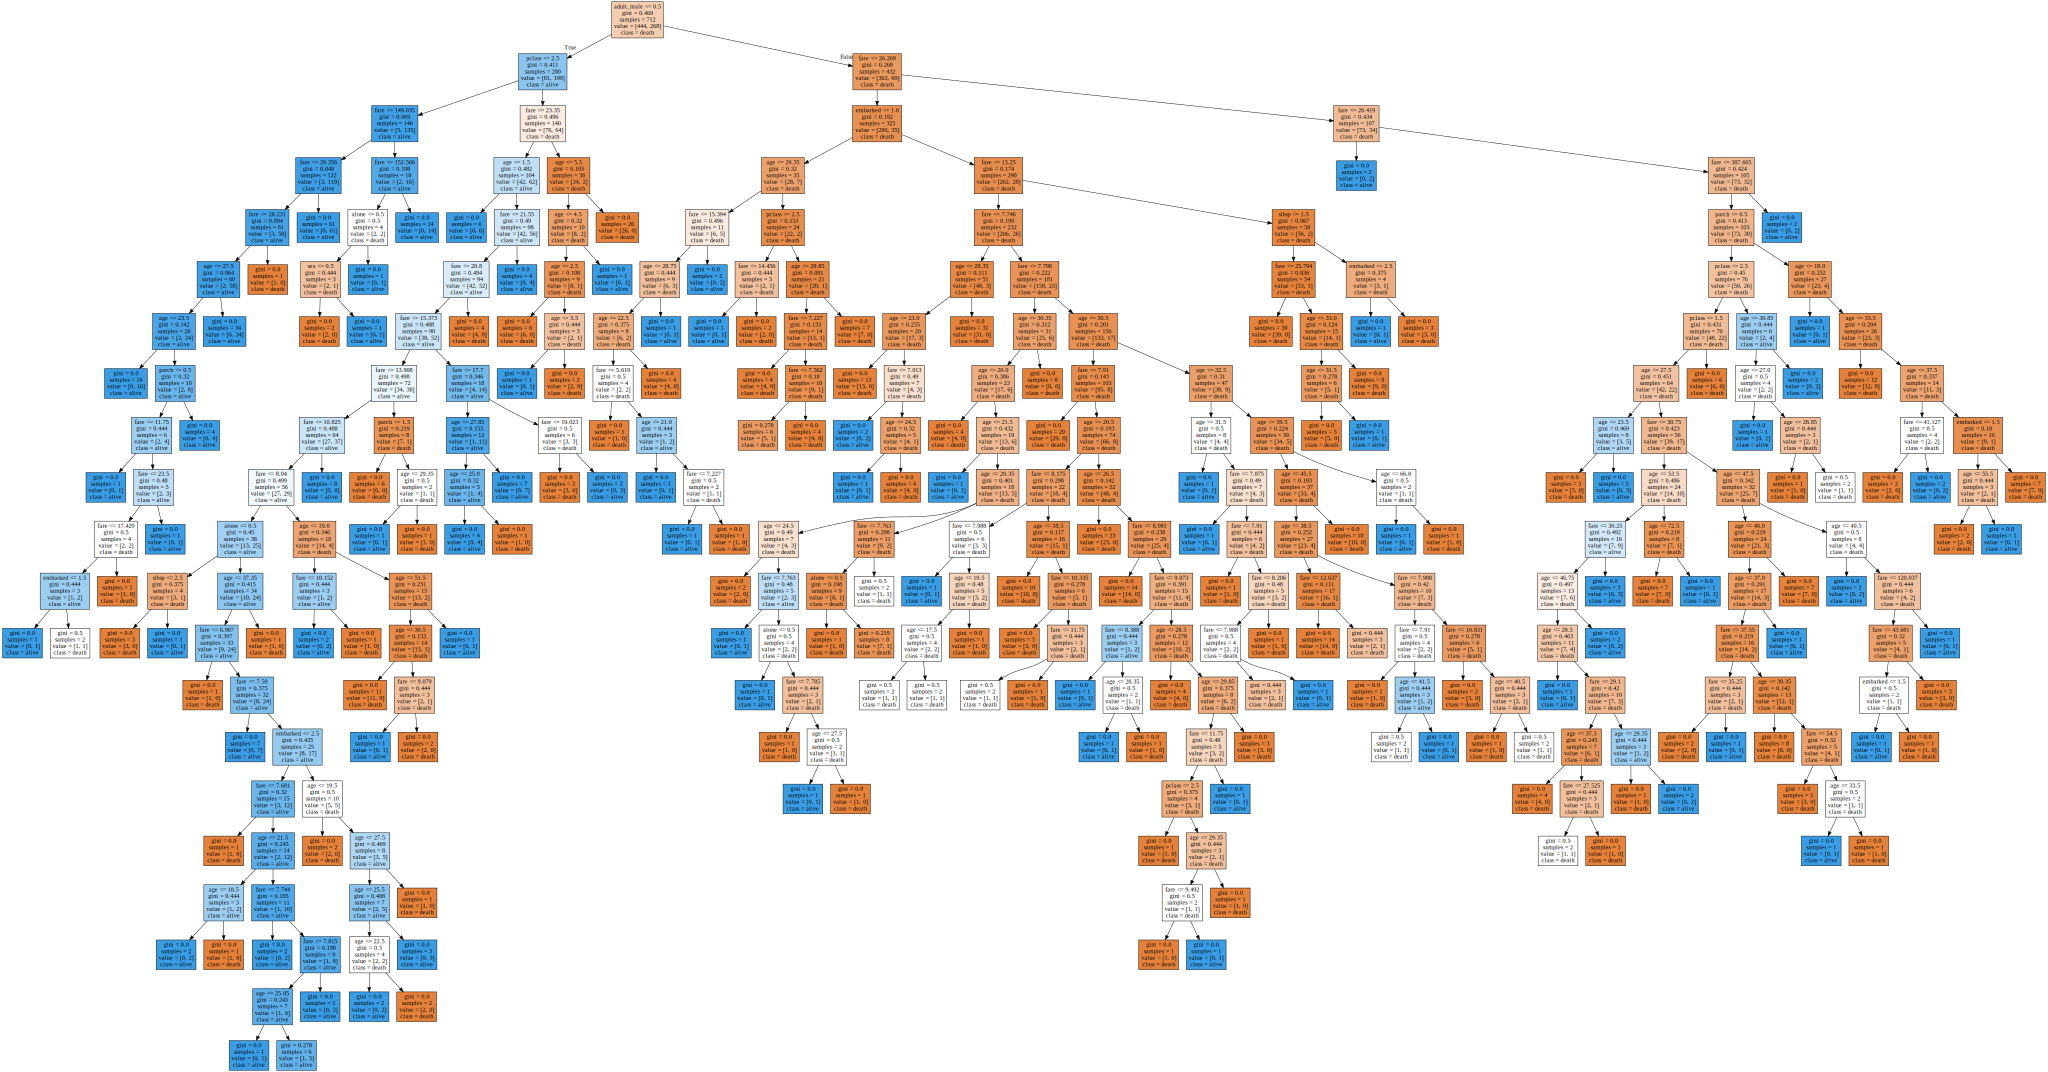

In [31]:
from sklearn.tree import export_graphviz

c_names = ['death', 'alive']

f_names = list(titanic.columns)
f_names.pop(0)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names = c_names,
feature_names = f_names, impurity=True, filled=True)

import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.124 0.004 0.224 0.006 0.009 0.284 0.016 0.325 0.009]


<AxesSubplot:>

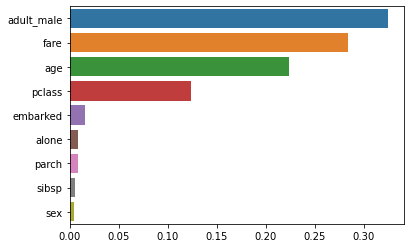

In [32]:
import seaborn as sns
import numpy as np

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3))) # 특징 중요도 출력

# feature별 importance 매핑
dic = {}

for name, value in zip(f_names, dt_clf.feature_importances_):
    dic[name] = value
    
# feature importance를 column 별로 시각화하기
x_val = []
y_val = []

for y, x in sorted(dic.items(), key = lambda x : x[1], reverse = True):
    y_val.append(y)
    x_val.append(x)
    
sns.barplot(x=x_val, y=y_val)  # 내림차순 정렬 필요

# 타이타닉 앙상블 분류기

In [ ]:
# 데이터 로드 및 패키지 임포트
# import Library
import pandas as pd
import seaborn as sns

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')

df.drop(['embark_town', 'alive', 'class'], axis=1, inplace=True)
df.age.fillna(df.age.mean(), inplace=True)
df.embarked.fillna("N", inplace=True)
df.deck = df.deck.astype("object")
df.deck.fillna("N", inplace=True)

en_list = df.dtypes[(df.dtypes=='object') | (df.dtypes=='bool') | (df.dtypes=='category')].index
for i in en_list:
    encoder = LabelEncoder()
    encoder.fit(df[i])
    df[i] = encoder.transform(df[i])

# 입력데이터 X와 출력데이터 y를 분리
X = df.drop('survived', axis=1)
y = df.survived

In [8]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8)
knn_clf = KNeighborsClassifier(n_neighbors=8)
dt_clf = DecisionTreeClassifier()

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf), ('DT',dt_clf)] , voting='soft')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.8324


In [9]:
# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf, rf_clf, dt_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

LogisticRegression 정확도: 0.8212
KNeighborsClassifier 정확도: 0.7039
RandomForestClassifier 정확도: 0.8324
DecisionTreeClassifier 정확도: 0.8547


# 와인 앙상블 분류기

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
red_dataset = pd.read_csv("C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\머신러닝\\데이터셋\\winequality-red.csv", sep = ";", encoding = "utf-8")
white_dataset = pd.read_csv("C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\머신러닝\\데이터셋\\winequality-white.csv", sep = ";", encoding = "utf-8")

red_dataset['redwhite'] = 0
white_dataset['redwhite'] = 1

dataset = pd.concat([red_dataset, white_dataset])

dataset.reset_index(inplace = True)

dataset.drop(dataset.columns[0], axis = 1, inplace = True)

dataset['quality_new'] = 0
dataset.loc[dataset.quality > 6, 'quality_new'] = 1

dataset.drop('quality', axis = 1, inplace = True)

In [45]:
X = dataset.drop('quality_new', axis = 1)
Y = dataset.quality_new

In [47]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [48]:
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8)
knn_clf = KNeighborsClassifier(n_neighbors=8)
dt_clf = DecisionTreeClassifier()

vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf), ('DT',dt_clf)] , voting='soft')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 156)
 
vo_clf.fit(X_train, Y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(Y_test, pred)))

Voting 분류기 정확도: 0.8592


In [49]:
classifiers = [lr_clf, knn_clf, rf_clf, dt_clf]
for classifier in classifiers:
    classifier.fit(X_train, Y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(Y_test, pred)))

LogisticRegression 정확도: 0.8069
KNeighborsClassifier 정확도: 0.7985
RandomForestClassifier 정확도: 0.8531
DecisionTreeClassifier 정확도: 0.8362
